<a href="https://colab.research.google.com/github/younggon2/Education/blob/master/Day1-2%20Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras 실습
* Tensorflow 2.x로 넘어오면서 Tensorflow와 Keras가 통합되어 가는 중
* 실습에서 사용할 colab에서는 Tensorflow 2.3을 사용하기 때문에 tf.keras 사용

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
%matplotlib inline

In [ ]:
tf.__version__

'2.3.0'

## STEP 1: Fashion MNIST 데이터 읽기

![대체 텍스트](https://www.pyimagesearch.com/wp-content/uploads/2019/02/fashion_mnist_dataset_sample.png)
![대체 텍스트](https://www.pyimagesearch.com/wp-content/uploads/2019/02/fashion_mnist_obtaining.jpg)

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

# initialize the label name
labelNames = ["top", "trouser", "pullover", "dress", "coat", 
              "sandal", "shirt", "sneaker", "bag", "ankle boot"]

4423680/4422102 [==============================] - 0s 0us/step


## STEP 2: 데이터 살펴보기

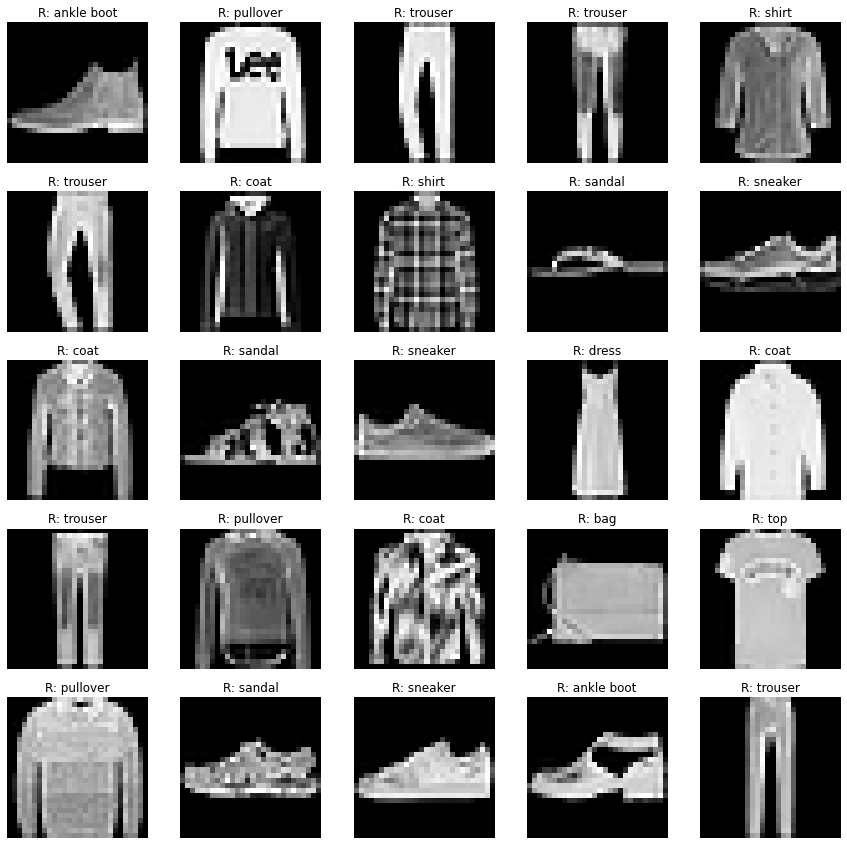

In [ ]:
plt_row = 5
plt_col = 5

width = height = 28

plt.rcParams["figure.figsize"] = (15,15)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[int(i/plt_row), i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(testX[i].reshape(width, height), cmap='gray')
    sub_plt_title = 'R: ' + labelNames[testY[i]]
    sub_plt.set_title(sub_plt_title)
plt.show()

## STEP 3: 딥러닝을 위한 데이터 전처리

In [ ]:
# flatten 28*28 images to a 784 vector for each image
width = height = 28
num_pixels = width * height
trainX = trainX.reshape(60000, num_pixels).astype('float32') / 255.0
testX = testX.reshape(10000, num_pixels).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
valX = trainX[50000:]
valY = trainY[50000:]
trainX = trainX[:50000]
trainY = trainY[:50000]

# one hot encode outputs
num_classes = 10
trainY = tf.keras.utils.to_categorical(trainY, num_classes)
valY = tf.keras.utils.to_categorical(valY, num_classes)
testY = tf.keras.utils.to_categorical(testY, num_classes)

print ('train shape: \t', trainX.shape)
print ('valid shape: \t', valX.shape)
print ('test shape: \t', testX.shape)

train shape: 	 (50000, 784)
valid shape: 	 (10000, 784)
test shape: 	 (10000, 784)


![대체 텍스트](https://www.simplilearn.com/ice9/free_resources_article_thumb/diagram-of-a-biological-neuron.jpg)
![대체 텍스트](http://bit.ly/2ldH0Bg)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def logistic_regression_model():
    # create model
    model = Sequential()
    
    model.add(Dense(num_classes, input_dim=num_pixels, kernel_initializer='normal', activation='softmax'))
    
    # compile model
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])
    
    return model

## STEP 5: 첫 번째 인공지능 모델 학습!!!

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
782/782 [==============================] - 3s 4ms/step - loss: 0.6321 - acc: 0.7883 - val_loss: 0.5205 - val_acc: 0.8232
Epoch 2/20
782/782 [==============================] - 3s 3ms/step - loss: 0.4877 - acc: 0.8341 - val_loss: 0.4820 - val_acc: 0.8315
Epoch 3/20
782/782 [==============================] - 3s 3ms/step - loss: 0.4608 - acc: 0.8441 - val_loss: 0.4600 - val_acc: 0.8398
Epoch 4/20
782/782 [==============================] - 3s 3ms/step - loss: 0.4447 - acc: 0.8495 - val_loss: 0.4466 - val_acc: 0.8463
Epoch 5/20
782/782 [==============================] - 3s 3ms/step - loss: 0.4357 - acc: 0.8520 - val_loss: 0.4569 - va

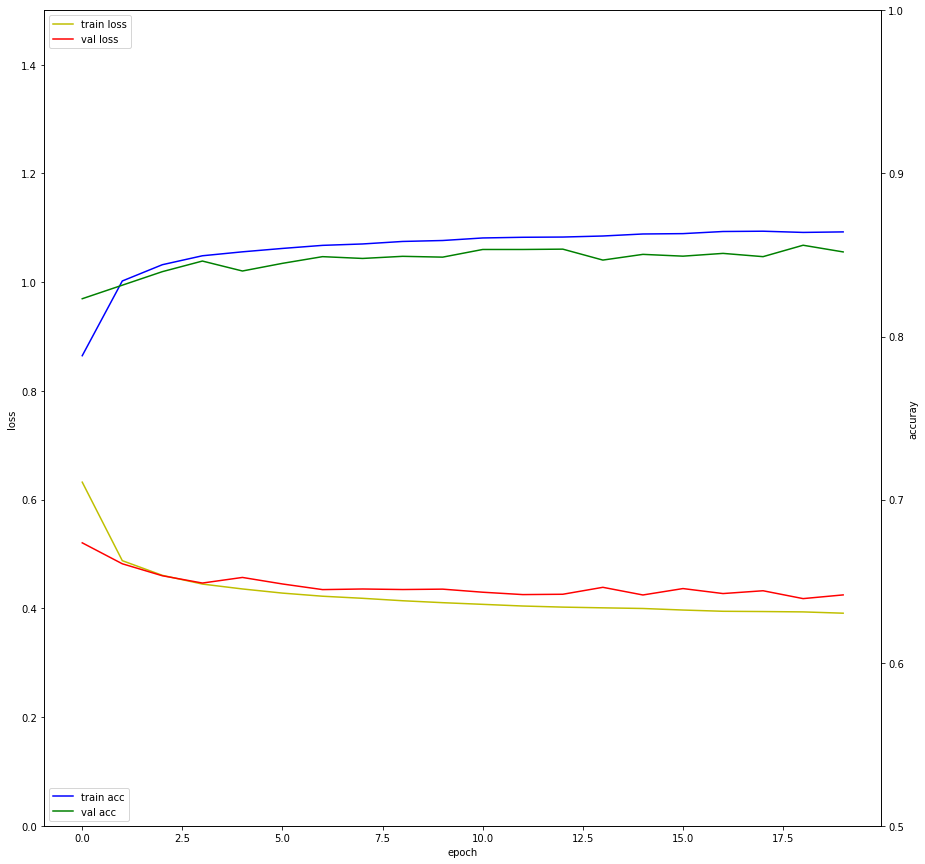

In [ ]:
model = logistic_regression_model()
model.summary()
# fix random seed for reproductibility
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

# FIT THE MODEL - OPTIMIZATION
hist = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=20, batch_size=64, verbose=1)
model.save('logistic_regression_model.h5')

# 학습과정 살펴보기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 1.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.5, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

## STEP 6: 결과 확인 (테스트 데이터셋)

In [ ]:
# Final evaluation of the model
scores = model.evaluate(testX, testY, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 15.63%


## STEP 7: 학습된 weight 살펴보기

W shape :  (784, 10)


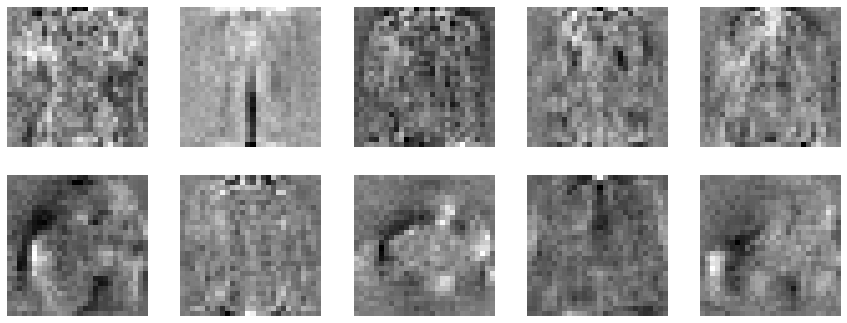

In [ ]:
# Visualize weights
W = model.layers[0].get_weights()[0]
print("W shape : ", W.shape)

W = np.transpose(W, (1,0))

plt.figure(figsize=(15, 15), frameon=False)
for ind, val in enumerate(W):
    plt.subplot(5, 5, ind + 1)
    im = val.reshape((28,28))
    plt.axis("off")
    plt.imshow(im, cmap='gray',interpolation='nearest')

## STEP 8: 두 번째 인공지능 모델 (Multi Layer Perceptron, MLP)
![대체 텍스트](https://www.researchgate.net/profile/Hadley_Brooks/publication/270274130/figure/fig3/AS:667886670594050@1536247999230/Architecture-of-a-multilayer-neural-network-with-one-hidden-layer-The-input-layer.png)

In [ ]:
def multi_layer_perceptron_model():
    # create model
    model = Sequential()
    
    model.add(Dense(256, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    # compile model
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])
    
    return model

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
782/782 [==============================] - 3s 4ms/step - loss: 0.8710 - acc: 0.7194 - val_loss: 0.5998 - val_acc: 0.7864
Epoch 2/20
782/782 [==============================] - 3s 4ms/step - loss: 0.5433 - acc: 0.8078 - val_loss: 0.5132 - val_acc: 0.8167
Epoch 3/20
782/782 [==============================] - 3s 4ms/step - loss: 0.4887 - acc: 0.8280 - val_loss: 0.4749 - val_acc: 0.8294
Epoch 4/20
782/782 [==============================] - 3s 4ms/step - loss: 0.4598 - acc: 0.8387 - val_loss: 0.4518 

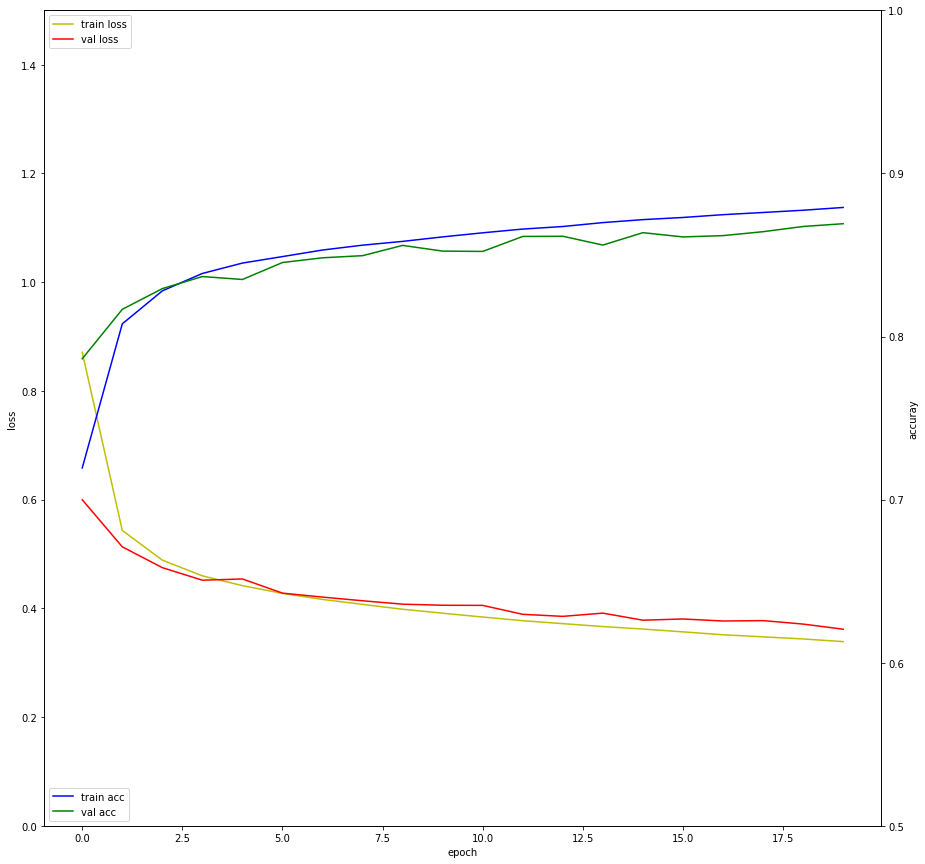

In [ ]:
# build the model
model = multi_layer_perceptron_model()
model.summary()

# fix random seed for reproductibility
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

# Fit the model
hist = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=20, batch_size=64, verbose=1)
model.save('multi_layer_perceptron_model.h5')

# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 1.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.5, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
# Final evaluation of the model
scores = model.evaluate(testX, testY, verbose=0)
print("Error: %.2f%%" % (100-scores[1]*100))

Error: 13.75%


## STEP 9: 세 번째 인공지능 모델 (DEEP-MLP)
![대체 텍스트](https://i.stack.imgur.com/OH3gI.png)
![대체 텍스트](https://www.saedsayad.com/images/ANN_Sigmoid.png)

In [ ]:
def deep_perceptron_initial_model():
    # create model
    model = Sequential()
    
    model.add(Dense(256, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(256, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(256, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(256, kernel_initializer='normal', activation='sigmoid')) 
    model.add(Dense(256, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    # compile model
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])
    
    return model

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_18 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_19 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_20 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                2570      
Total params: 466,698
Trainable params: 466,698
Non-trainable params: 0
________________________________________________

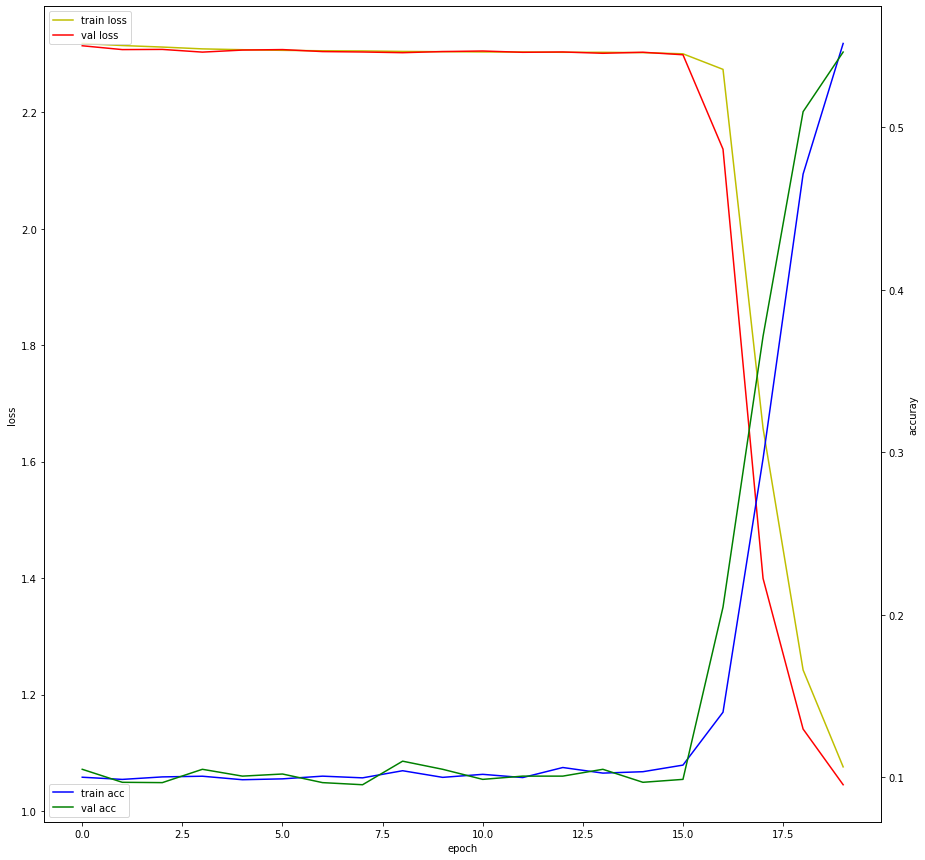

In [ ]:
# build the model
model = deep_perceptron_initial_model()
model.summary()

# fix random seed for reproductibility
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

# Fit the model
hist = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=20, batch_size=64, verbose=1)
model.save('deep_perceptron_initial_model.h5')

# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
# Final evaluation of the model
scores = model.evaluate(testX, testY, verbose=0)
print("Error: %.2f%%" % (100-scores[1]*100))

Error: 45.83%


## STEP 10: 세 번째 인공지능 모델의 문제점 개선
![대체 텍스트](https://image.slidesharecdn.com/usuconference-deeplearning-160418191119/95/introduction-to-deep-learning-7-638.jpg?cb=1461006739)
![대체 텍스트](https://smartstuartkim.files.wordpress.com/2019/02/vanishinggradient-1.png?w=1140&h=492)

In [ ]:
#  Hint
# 'relu'

def deep_perceptron_model_with_relu():
    # create model
    model = Sequential()
    
    model.add(Dense(256, input_dim=num_pixels, kernel_initializer='normal', activation='????'))
    model.add(Dense(256, kernel_initializer='normal', activation='????'))
    model.add(Dense(256, kernel_initializer='normal', activation='????'))
    model.add(Dense(256, kernel_initializer='normal', activation='????'))
    model.add(Dense(256, kernel_initializer='normal', activation='????'))    
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # compile model
    
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])
    
    return model

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_23 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_24 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_25 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_26 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_27 (Dense)             (None, 10)                2570      
Total params: 466,698
Trainable params: 466,698
Non-trainable params: 0
________________________________________________

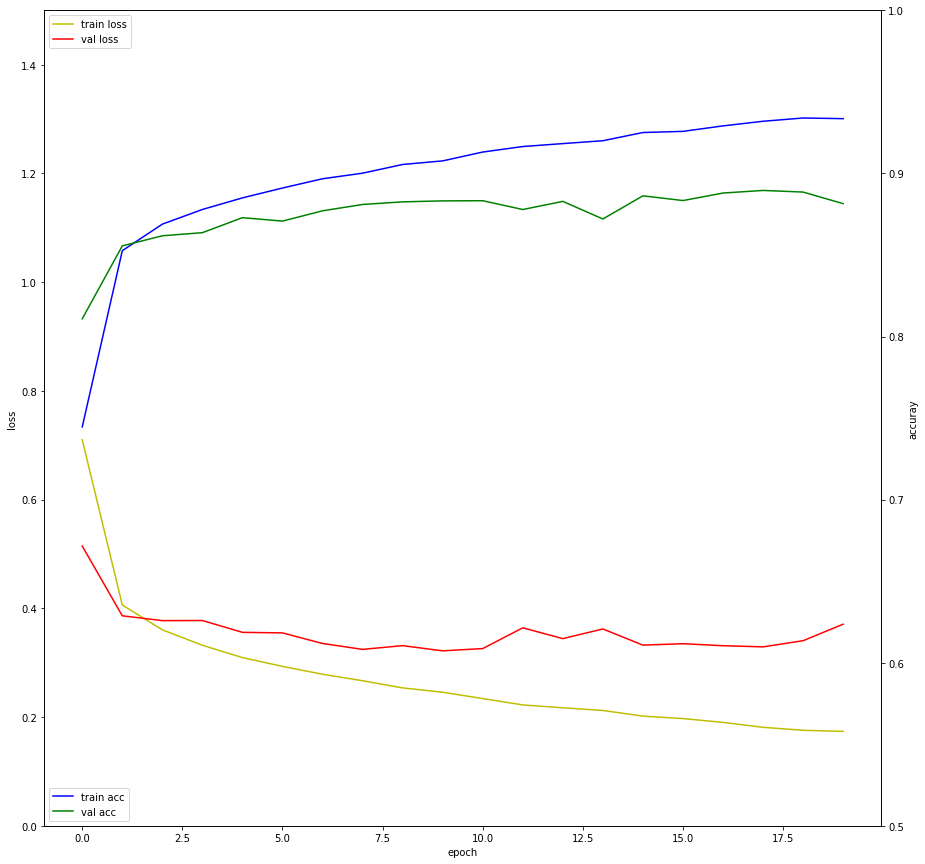

In [ ]:
# build the model
model = deep_perceptron_model_with_relu()
model.summary()

# fix random seed for reproductibility
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

# Fit the model
hist = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=20, batch_size=64, verbose=1)
model.save('deep_perceptron_model_with_dropout.h5')

# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 1.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.5, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
# Final evaluation of the model
scores = model.evaluate(testX, testY, verbose=0)
print("Perceptron model with relu error: %.2f%%" % (100-scores[1]*100))

Perceptron model with relu error: 11.97%


![대체 텍스트](https://miro.medium.com/max/1200/1*iWQzxhVlvadk6VAJjsgXgg.png)

In [ ]:
#  Hint
from tensorflow.keras.layers import Dropout

def deep_perceptron_model_with_relu_dropout():
    # create model
    model = Sequential()
    model.add(Dense(256, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(????(0.2))
    
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(????(0.2))
    
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(????(0.2))
    
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(????(0.2))
    
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(????(0.2))
    
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    # compile model
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])
    
    return model

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 256)             

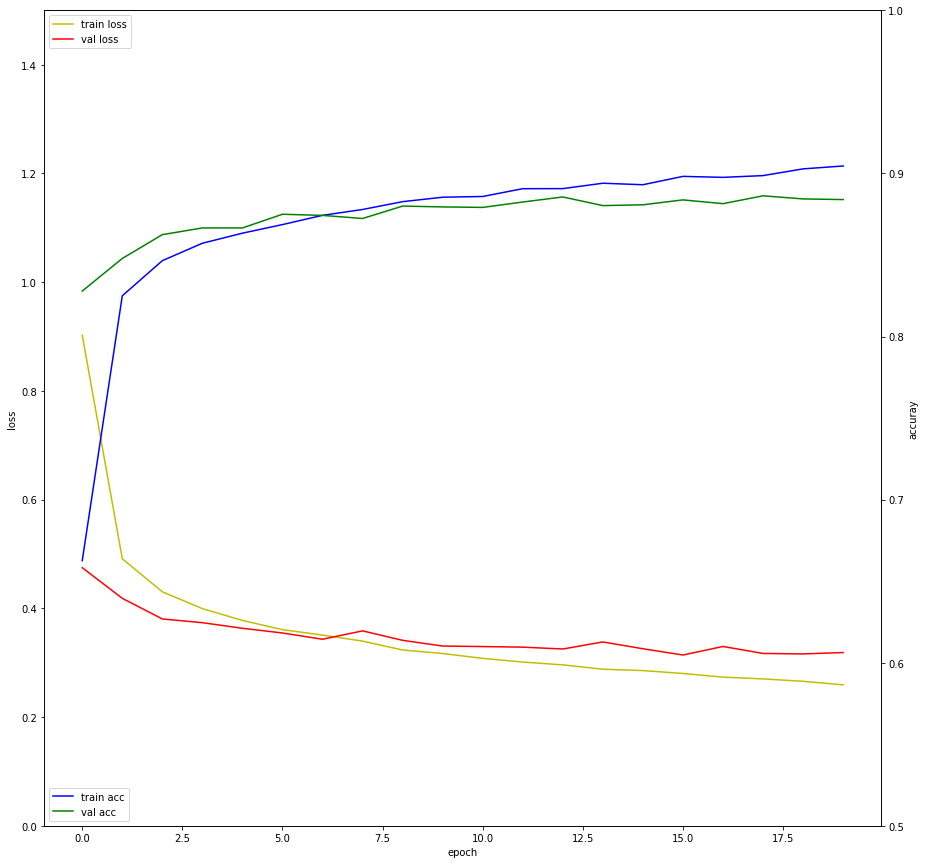

In [ ]:
# build the model
model = deep_perceptron_model_with_relu_dropout()
model.summary()

# fix random seed for reproductibility
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

# Fit the model
hist = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=20, batch_size=64, verbose=1)
model.save('deep_perceptron_model_with_dropout.h5')

# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 1.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.5, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
# Final evaluation of the models
scores = model.evaluate(testX, testY, verbose=0)
print("Perceptron model with relu and dropout error: %.2f%%" % (100-scores[1]*100))

Perceptron model with relu and dropout error: 11.96%
